In [2]:
# Mounting Google-Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Pre-Processing

In [3]:
import pandas as pd
import numpy as np
import re
!pip install demoji
import demoji
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 42 kB 838 kB/s 


In [4]:
# Importing Dataset
df = pd.read_csv('/content/gdrive/MyDrive/Capstone/text_emotion.csv')
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
# To remove Emojis and Emoticons
def emojis(tweet):
  dem = demoji.findall(tweet)
  for item in dem.keys():
    tweet = tweet.replace(item, ' ')
  return tweet

In [6]:
# Importing Dictionary for common misspellings
# http://norvig.com/spell-correct.html
misspell_data = pd.read_csv('/content/gdrive/MyDrive/Capstone/Spell_Check/aspell.txt',
                                 sep = ':', names = ["correction","misspell"])
misspell_data.misspell = misspell_data.misspell.str.strip()
misspell_data.misspell = misspell_data.misspell.str.split(" ")
misspell_data = misspell_data.explode("misspell").reset_index(drop=True)
misspell_data.drop_duplicates("misspell",inplace=True)
miss_corr = dict(zip(misspell_data.misspell, misspell_data.correction))

# Sample of the dict
{v:miss_corr[v] for v in [list(miss_corr.keys())[k] for k in range(20)]}

{'Steffen': 'Stephen',
 'abilitey': 'ability',
 'abouy': 'about',
 'absorbtion': 'absorption',
 'accidently': 'accidentally',
 'accomodate': 'accommodate',
 'acommadate': 'accommodate',
 'acord': 'accord',
 'adultry': 'adultery',
 'aggresive': 'aggressive',
 'alchohol': 'alcohol',
 'alchoholic': 'alcoholic',
 'allieve': 'alive',
 'alright': 'all_right',
 'aquantance': 'acquaintance',
 'equire': 'acquire',
 'nevade': 'Nevada',
 'presbyterian': 'Presbyterian',
 'rsx': 'RSX',
 'susan': 'Susan'}

In [7]:
# To correct misspelled words
def MisspelledCorrection(tweet):
  for x in tweet.split():
    if x in miss_corr.keys():
      tweet = tweet.replace(x, miss_corr[x])
  return tweet

In [8]:
# Import list of common English Contractions
contractions = pd.read_csv("/content/gdrive/MyDrive/Capstone/contractions.csv")
print(contractions)
cont_dic = dict(zip(contractions.Contraction, contractions.Meaning))

    Contraction       Meaning
0        'aight       alright
1         ain't        is not
2         amn't        am not
3        aren't       are not
4         can't        cannot
..          ...           ...
143    y'all're  you all are 
144       you'd     you would
145      you'll      you will
146      you're       you are
147      you've      you have

[148 rows x 2 columns]


In [9]:
# To Convert Contractions to their Meaning
def Cont_to_Meaning(tweet):
  for x in tweet.split():
    if x in cont_dic.keys():
      tweet = tweet.replace(x, cont_dic[x])
  return tweet

In [10]:
# Pre-processing Tweets
def cleaning(tweet):
  # Converting tweet to Lower Case
  tweet = tweet.lower()
  # Removing Mentions (@...) and Hashtags (#...)
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  tweet = re.sub("#[A-Za-z0-9_]+","", tweet)
  # Removing URL Links
  tweet = re.sub(r'https?:\/\/\S+', '', tweet)
  tweet = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', tweet)
  # Removing Placeholders sometimes found in some data
  tweet = re.sub(r'{link}', '', tweet)
  tweet = re.sub(r"\[video\]", '', tweet)
  # Remove emojis
  tweet = emojis(tweet)
  # Correct Spellings
  tweet = MisspelledCorrection(tweet)
  # Converting Contractions to their Meaning
  tweet = Cont_to_Meaning(tweet)
  return tweet

In [11]:
# Applying cleaning to all tweets
df['content'] = df.content.apply(lambda x: cleaning(x))
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon!
4,1956968416,neutral,xkilljoyx,we want to trade with someone who has houston...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,
39996,1753919001,love,drapeaux,happy mothers day all my love
39997,1753919005,love,JenniRox,happy mother's day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,wassup beautiful!!! follow me!! peep out my ...


In [12]:
# Removing blank tweets after pre-processing
df['content'].replace('', np.nan, inplace = True)
df.dropna(subset = ['content'], inplace = True)
df

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon!
4,1956968416,neutral,xkilljoyx,we want to trade with someone who has houston...
...,...,...,...,...
39994,1753918900,happiness,courtside101,succesfully following tayla!!
39996,1753919001,love,drapeaux,happy mothers day all my love
39997,1753919005,love,JenniRox,happy mother's day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,wassup beautiful!!! follow me!! peep out my ...


In [13]:
# Available Emotions
df['sentiment'].value_counts()

neutral       8582
worry         8455
happiness     5208
sadness       5162
love          3841
surprise      2187
fun           1776
relief        1526
hate          1323
empty          817
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [14]:
# Assigning numerical IDs to each sentiment
id  = {"empty":       0,
       "sadness":     1,
       "enthusiasm":  2,
       "neutral":     3,
       "worry":       4,
       "surprise":    5,
       "love":        6,
       "fun":         7,
       "hate":        8,
       "happiness":   9,
       "boredom":     10,
       "relief":      11,
       "anger":       12}

In [15]:
# Updating Sentiment to their respective IDs
df["sentiment_id"] = df['sentiment'].map(id)
df

,tweet_id,sentiment,author,content,sentiment_id
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,0
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,coolfunky,funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon!,2
4,1956968416,neutral,xkilljoyx,we want to trade with someone who has houston...,3
...,...,...,...,...,...
39994,1753918900,happiness,courtside101,succesfully following tayla!!,9
39996,1753919001,love,drapeaux,happy mothers day all my love,6
39997,1753919005,love,JenniRox,happy mother's day to all the mommies out ther...,6
39998,1753919043,happiness,ipdaman1,wassup beautiful!!! follow me!! peep out my ...,9


In [16]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(df.sentiment_id)

onehot_encoder = OneHotEncoder(sparse = False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
Y = onehot_encoder.fit_transform(int_encoded)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.content, Y,
                                                    random_state = 2000,
                                                    test_size = 0.2,
                                                    shuffle = True)

## LSTM

In [18]:
!pip install transformers
!pip install tensorflow
!pip install keras
import transformers
from transformers import TFAutoModel, AutoTokenizer
!pip install tokenizers
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from keras.preprocessing import sequence, text
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
import tensorflow as tf
import keras
from tensorflow.keras.layers import LSTM

from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam

     |████████████████████████████████| 4.0 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 41.1 MB/s 
     |████████████████████████████████| 895 kB 37.2 MB/s 
     |████████████████████████████████| 6.6 MB 37.6 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 462 kB 5.4 MB/s 


In [19]:
token = text.Tokenizer(num_words=None)
max_len = 160
Epoch = 5
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [20]:
w_idx = token.word_index

In [21]:
embed_dim = 160
lstm_out = 200

model = Sequential()
model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.core.Dense(13, activation='softmax'))
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 160)          4967040   
                                                                 
 spatial_dropout1d (SpatialD  (None, 160, 160)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200)               288800    
                                                                 
 dense (Dense)               (None, 13)                2613      
                                                                 
Total params: 5,258,453
Trainable params: 5,258,453
Non-trainable params: 0
_________________________________________________________________
None


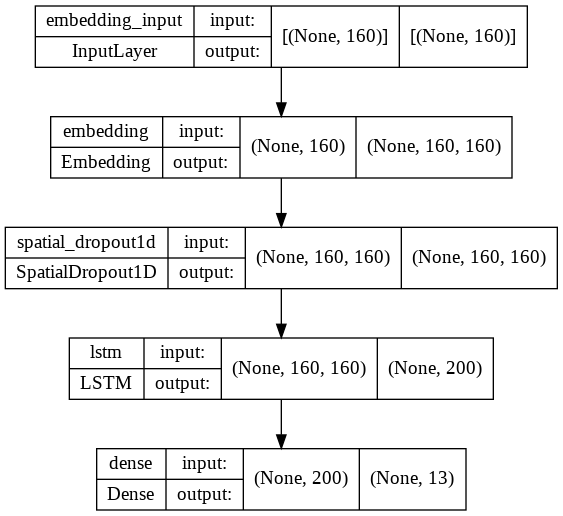

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
batch_size = 32

In [ ]:
!pip install pyyaml h5py
import os
checkpoint_path = "/content/gdrive/MyDrive/Capstone/Checkpoints/cp.cpkt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
history = model.fit(X_train_pad, y_train,
          epochs = Epoch,
          batch_size=batch_size,
          validation_data=(X_test_pad, y_test),
          callbacks=[cp_callback])

Epoch 1/5
999/999 [==============================] - ETA: 0s - loss: 2.0098 - accuracy: 0.3012
Epoch 1: saving model to /content/gdrive/MyDrive/Capstone/Checkpoints/cp.cpkt
999/999 [==============================] - 1285s 1s/step - loss: 2.0098 - accuracy: 0.3012 - val_loss: 1.8841 - val_accuracy: 0.3588
Epoch 2/5
999/999 [==============================] - ETA: 0s - loss: 1.7614 - accuracy: 0.4037
Epoch 2: saving model to /content/gdrive/MyDrive/Capstone/Checkpoints/cp.cpkt
999/999 [==============================] - 1240s 1s/step - loss: 1.7614 - accuracy: 0.4037 - val_loss: 1.8803 - val_accuracy: 0.3606
Epoch 3/5
999/999 [==============================] - ETA: 0s - loss: 1.4842 - accuracy: 0.5063
Epoch 3: saving model to /content/gdrive/MyDrive/Capstone/Checkpoints/cp.cpkt
999/999 [==============================] - 1235s 1s/step - loss: 1.4842 - accuracy: 0.5063 - val_loss: 2.0423 - val_accuracy: 0.3349
Epoch 4/5
999/999 [==============================] - ETA: 0s - loss: 1.1745 - accu

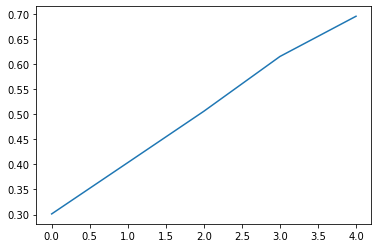

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])

In [ ]:
def get_sentiment(model,text):
    text = cleaning(text)
    #tokenize
    twt = token.texts_to_sequences([text])
    twt = sequence.pad_sequences(twt, maxlen=max_len, dtype='int32')
    sentiment = model.predict(twt,batch_size=1,verbose = 2)
    sent = np.round(np.dot(sentiment,100).tolist(),0)[0]
    result = pd.DataFrame([id.keys(),sent]).T
    result.columns = ["sentiment","percentage"]
    result=result[result.percentage !=0]
    return result

In [ ]:
result = get_sentiment(model,"Had an absolutely brilliant day ðŸ˜ loved seeing an old friend and reminiscing")
print(result)
result = get_sentiment(model,"The pain my heart feels is just too much for it to bear. Nothing eases this pain. I can’t hold myself back. I really miss you")
print(result)
result = get_sentiment(model,"I hate this game so much,It make me angry all the time ")
print(result)

1/1 - 0s - 439ms/epoch - 439ms/step
   sentiment percentage
1    sadness        6.0
3    neutral        2.0
4      worry        1.0
6       love       22.0
7        fun       10.0
9  happiness       58.0
1/1 - 0s - 240ms/epoch - 240ms/step
    sentiment percentage
1     sadness       63.0
3     neutral        1.0
4       worry       15.0
5    surprise        1.0
6        love       14.0
8        hate        1.0
9   happiness        2.0
11     relief        2.0
1/1 - 0s - 118ms/epoch - 118ms/step
   sentiment percentage
0      empty        1.0
1    sadness       38.0
3    neutral        1.0
4      worry        6.0
6       love        1.0
8       hate       50.0
10   boredom        1.0


In [ ]:
for index, row in result.iterrows():
  print(row['sentiment'])

empty
sadness
neutral
worry
love
hate
boredom


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
model.save('/content/gdrive/MyDrive/Capstone/my_model')
#model.save_weights('/content/gdrive/MyDrive/Capstone/model_weights.h5')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Capstone/my_model/assets


In [ ]:
os.listdir(checkpoint_dir)


['cp.cpkt.index', 'checkpoint', 'cp.cpkt.data-00000-of-00001']

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'/content/gdrive/MyDrive/Capstone/Checkpoints/cp.cpkt'

## LSTM Glove

In [ ]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() 
        word2vector = {}
        for line in f:
            line_ = line.strip() 
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [ ]:
vocab, word_to_idx =read_data("/content/gdrive/MyDrive/Capstone/glove/glove.6B.200d.txt")

Total Words in DataSet: 400000


In [ ]:
embedding_matrix = np.zeros((len(w_idx) + 1, 200))
for word, i in w_idx.items():
    embedding_vector = word_to_idx.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embed_dim = 200
lstm_out = 250

model_lstm_gwe = Sequential()
model_lstm_gwe.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1],weights=[embedding_matrix],trainable=False))
model_lstm_gwe.add(SpatialDropout1D(0.2))
model_lstm_gwe.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model_lstm_gwe.add(keras.layers.core.Dense(13, activation='softmax'))
#adam rmsprop 
model_lstm_gwe.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model_lstm_gwe.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 160, 200)          6208800   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 160, 200)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 250)               451000    
                                                                 
 dense_1 (Dense)             (None, 13)                3263      
                                                                 
Total params: 6,663,063
Trainable params: 454,263
Non-trainable params: 6,208,800
_________________________________________________________________
None


In [ ]:
batch_size = 32

In [ ]:
model_lstm_gwe.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))

Epoch 1/5
999/999 [==============================] - 884s 880ms/step - loss: 2.0155 - accuracy: 0.2996 - val_loss: 1.8949 - val_accuracy: 0.3572
Epoch 2/5
999/999 [==============================] - 852s 853ms/step - loss: 1.9006 - accuracy: 0.3449 - val_loss: 1.8687 - val_accuracy: 0.3622
Epoch 3/5
999/999 [==============================] - 864s 865ms/step - loss: 1.8577 - accuracy: 0.3573 - val_loss: 1.8564 - val_accuracy: 0.3687
Epoch 4/5
999/999 [==============================] - 860s 861ms/step - loss: 1.8244 - accuracy: 0.3688 - val_loss: 1.8506 - val_accuracy: 0.3760
Epoch 5/5
999/999 [==============================] - 863s 864ms/step - loss: 1.7879 - accuracy: 0.3816 - val_loss: 1.8507 - val_accuracy: 0.3733


In [ ]:
result = get_sentiment(model_lstm_gwe,"Had an absolutely brilliant day ðŸ˜ loved seeing an old friend and reminiscing")
print(result)
result = get_sentiment(model_lstm_gwe,"The pain my heart feels is just too much for it to bear. Nothing eases this pain. I can’t hold myself back. I really miss you")
print(result)
result = get_sentiment(model_lstm_gwe,"I hate this game so much,It make me angry all the time ")
print(result)

1/1 - 0s - 445ms/epoch - 445ms/step
     sentiment percentage
1      sadness        4.0
2   enthusiasm        1.0
3      neutral        4.0
4        worry        6.0
5     surprise       10.0
6         love       32.0
7          fun        4.0
9    happiness       38.0
11      relief        2.0
1/1 - 0s - 94ms/epoch - 94ms/step
     sentiment percentage
1      sadness       34.0
2   enthusiasm        1.0
3      neutral        5.0
4        worry       47.0
5     surprise        3.0
6         love        4.0
7          fun        1.0
9    happiness        2.0
11      relief        3.0
1/1 - 0s - 99ms/epoch - 99ms/step
   sentiment percentage
0      empty        1.0
1    sadness       14.0
3    neutral        3.0
4      worry        9.0
5   surprise        1.0
6       love        1.0
8       hate       69.0
10   boredom        1.0


## Robert

In [22]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        list(texts), 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

def build_model(transformer, max_len=160):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(13, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [23]:
AUTO = tf.data.experimental.AUTOTUNE
MODEL = 'roberta-base'

In [24]:
tokenizer = AutoTokenizer.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [25]:
X_train_t = regular_encode(X_train, tokenizer, maxlen=max_len)
X_test_t = regular_encode(X_test, tokenizer, maxlen=max_len)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [26]:
batch_size = 32
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train_t, y_train))
    .repeat()
    .shuffle(1995)
    .batch(batch_size)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_test_t, y_test))
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [27]:
import keras
import tensorflow as tf
from keras.layers import Input

transformer_layer = TFAutoModel.from_pretrained(MODEL)
model_roberta_base = build_model(transformer_layer, max_len=max_len)
model_roberta_base.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 160)]            0         
                                                                 
 tf_roberta_model (TFRoberta  TFBaseModelOutputWithPoo  124645632
 Model)                      lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             160, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
n_steps = X_train.shape[0] // batch_size
model_roberta_base.fit(train_dataset,steps_per_epoch=n_steps,validation_data=valid_dataset,epochs=Epoch)

Epoch 1/5
998/998 [==============================] - 2110s 2s/step - loss: 2.0278 - accuracy: 0.2937 - val_loss: 1.7714 - val_accuracy: 0.3882
Epoch 2/5
998/998 [==============================] - 2083s 2s/step - loss: 1.7689 - accuracy: 0.3944 - val_loss: 1.7218 - val_accuracy: 0.4134
Epoch 3/5
998/998 [==============================] - 2086s 2s/step - loss: 1.6895 - accuracy: 0.4193 - val_loss: 1.7423 - val_accuracy: 0.4076
Epoch 4/5
998/998 [==============================] - 2089s 2s/step - loss: 1.6112 - accuracy: 0.4465 - val_loss: 1.7854 - val_accuracy: 0.4014
Epoch 5/5
998/998 [==============================] - 2100s 2s/step - loss: 1.5233 - accuracy: 0.4747 - val_loss: 1.8574 - val_accuracy: 0.3926
